In [27]:
import numpy as np
import jax
import jax.numpy as jnp
import optax
import matplotlib.pyplot as plt
from localization import datasets, models, samplers
from localization.utils import ipr, entropy, build_DRT
from localization.experiments.multiple_targets import progression

In [71]:
# Define config
config = dict(
    # data config
    num_dimensions=40,
    adjust=(-1, 1),
    class_proportion=0.5,
    # model config
    # model_cls=models.SimpleNet,
    model_cls=models.MLP,
    activation='relu', use_bias=False, batch_size=1000, init_scale=0.01, learning_rate=0.1, evaluation_interval=100,
    # activation='sigmoid', use_bias=True, bias_value=-1, bias_trainable=False, batch_size=1000, init_scale=0.1, learning_rate=0.1, evaluation_interval=10,
    num_hiddens=10,
    sampler_cls=samplers.EpochSampler,
    init_fn=models.xavier_normal_init,
    optimizer_fn=optax.sgd,
    num_epochs=1000,
    # experiment config
    seed=42,#0,
    save_=True,
)
DRT = build_DRT(40)

In [72]:
weights = progression(config, loss_fn='ce')

Already simulated
Already simulated
Already simulated
Already simulated
Already simulated


(array([2., 2., 1., 1., 1., 0., 0., 1., 1., 1.]),
 array([0.04616551, 0.05954041, 0.0729153 , 0.0862902 , 0.09966509,
        0.11303999, 0.12641488, 0.13978978, 0.15316467, 0.16653956,
        0.17991446]),
 <BarContainer object of 10 artists>)

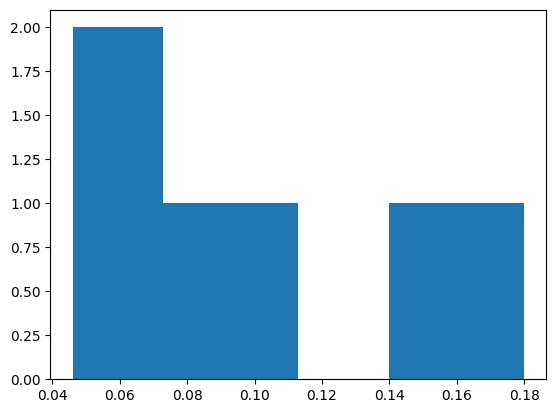

In [73]:
x = ipr(weights[0])
plt.hist(x)

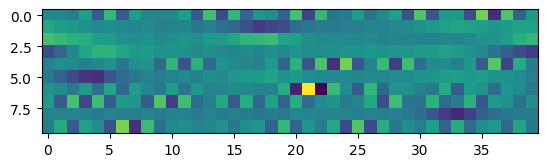

In [76]:
plt.imshow(weights[0])

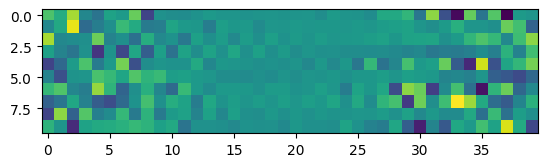

In [80]:
plt.imshow((DRT @ weights[0].T).T)

(array([5., 0., 0., 0., 0., 0., 1., 0., 3., 1.]),
 array([1.04974771, 1.11643124, 1.18311477, 1.2497983 , 1.31648183,
        1.38316536, 1.44984877, 1.5165323 , 1.58321583, 1.64989936,
        1.71658289]),
 <BarContainer object of 10 artists>)

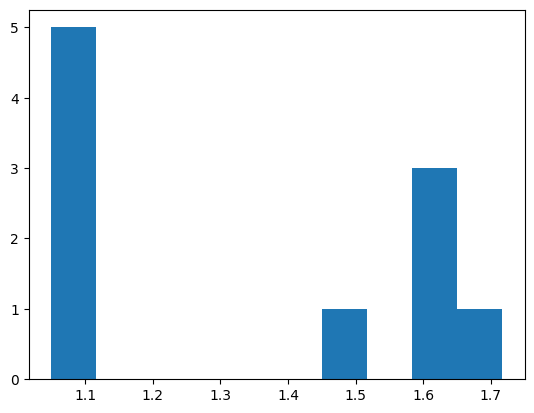

In [83]:
x = np.linalg.norm(DRT @ weights[0].T, axis=0)
plt.hist(x)

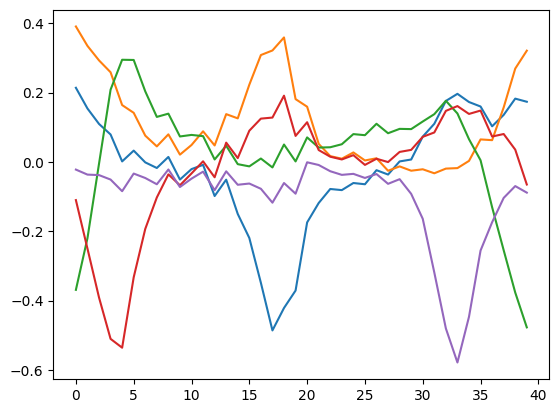

In [85]:
t = 1.3
_ = plt.plot(weights[0][x<t].T)

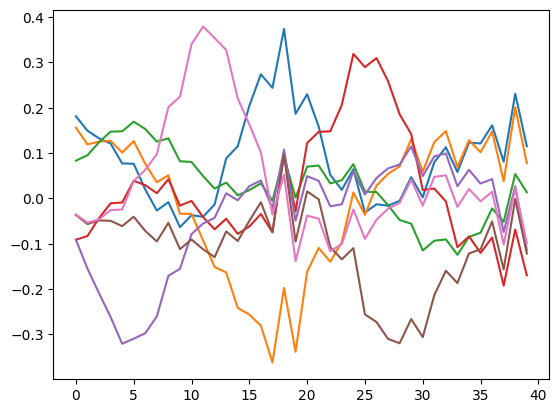

In [110]:
x = np.linalg.norm(weights[2] @ DRT[:,-4:], axis=1)
# plt.hist(x)
_ = plt.plot(weights[2][x<0.3].T)

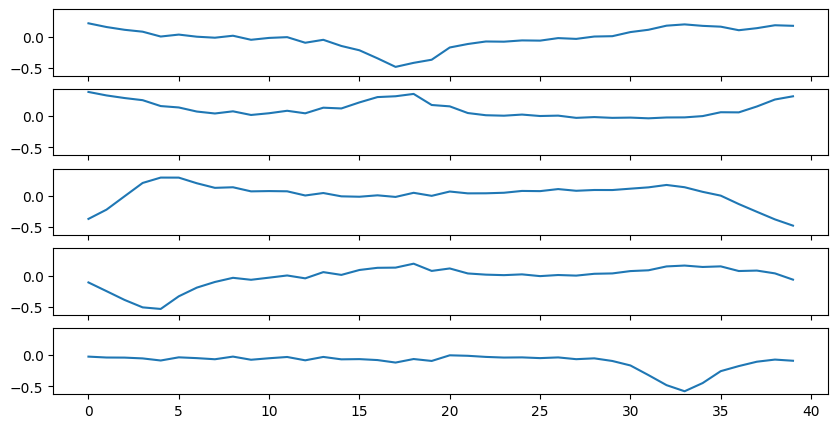

In [93]:
fig, axs = plt.subplots(int(sum(x<t)), 1, figsize=(10, 5), sharex=True, sharey=True)
for i, ax in enumerate(axs):
    ax.plot(weights[0][x<t][i])

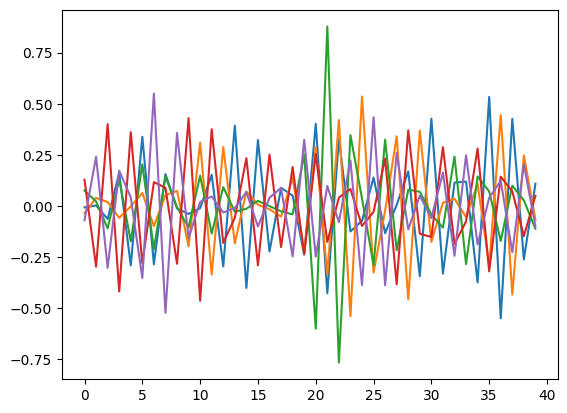

In [86]:
_ = plt.plot(weights[0][x>=t].T)